This is My Homework lattice filter demonstration with custome lattice coefficient<br>
Made by **Imam Syahrizal** <br>
Electrical Engineering Student in Universitas Gadjah Mada <br>

# Lattice Filter

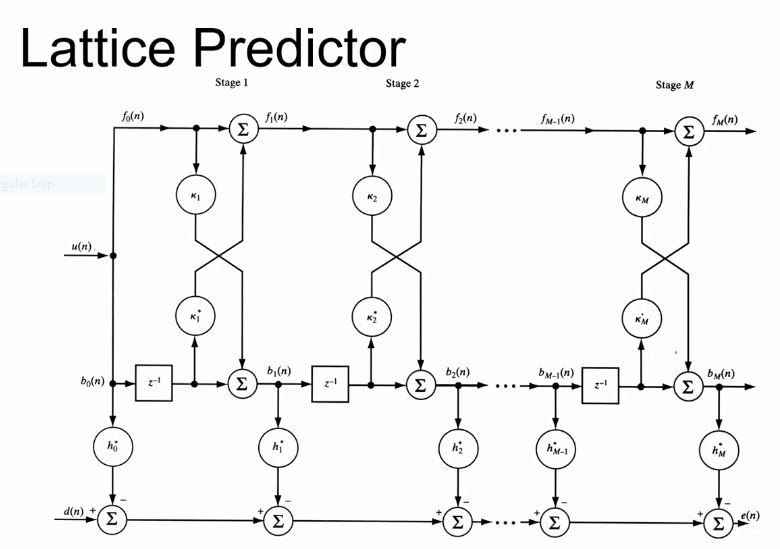

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Variable
# time sampling
t = np.linspace(0,1,100)

# desired signal - in this case sinusoid
d = 25*np.sin(2*np.pi*t)

# input signal = desired + noise
from numpy.random import randn
noise = randn(len(d)) # noise is gaussian number
u = d + noise

# lattice coefficient
k = np.array([0.5, 0.8, 0.8, 0.9, 0.6]) # semakin banyak semakin baik
# stage of lattice coefficient
m = len(k)

# Define matrix for input, forward, and backward
ud = np.zeros((m,len(u)))
f = np.zeros((m,len(u)))
b = np.zeros((m,len(u)))

ud[0]=u #initialize condition u0 = input
f[0]=u #initialize condition f0 = input
b[0]=u #initialize condition b0 = input

In [ ]:
# Lattice Filter
for i in range(1, m):
  # make delay input in matrix form
  dump=np.insert(ud[i-1],0,0)
  dump=dump[:len(u)]
  ud[i]=dump

  # make delay for backward, ex >> must have b0[n-1] when try to find b1[n]
  bd=np.insert(b[i-1],0,0)
  bd=bd[:len(u)]
  
  # main algorithm
  f[i]=f[i-1] + k[i-1]*bd #update fm (forward matrix)
  b[i]=k[i]*f[i-1]+bd #update bm (backward matrix)

In [ ]:
# Scalling the prediction forward and backward only for visual purpose
amp_f=(max(f[m-1])-min(f[m-1]))/2
amp_b=(max(b[m-1])-min(b[m-1]))/2
amp=(max(d)-min(d))/2

f[m-1]=(f[m-1]/amp_f)*amp
b[m-1]=(b[m-1]/amp_b)*amp

Text(0.5, 1.0, 'Forward')

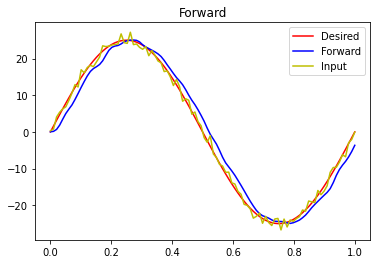

In [ ]:
# Ploting Forward
plt.plot(t,d,'r',t,f[m-1],'b',t,u,'y')
plt.legend(('Desired','Forward','Input'), loc = 'upper right')
plt.title('Forward')

Text(0.5, 1.0, 'Backward')

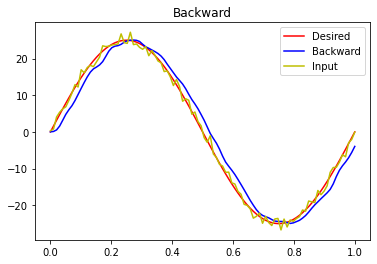

In [ ]:
# Ploting Backward
plt.plot(t,d,'r',t,b[m-1],'b',t,u,'y')
plt.legend(('Desired','Backward','Input'), loc = 'upper right')
plt.title('Backward')

Text(0.5, 1.0, 'Forward vs Backward')

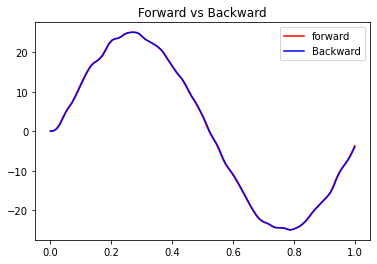

In [ ]:
# Forward vs Backward

plt.plot(t,f[m-1],'r',t,b[m-1],'b')
plt.legend(('forward','Backward'), loc = 'upper right')
plt.title('Forward vs Backward')

Text(0.5, 1.0, 'Auto Stage Process')

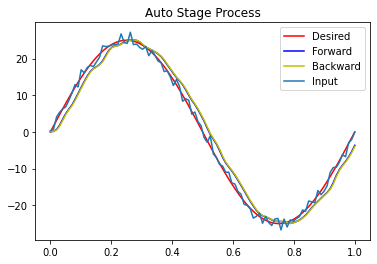

In [ ]:
# Plotting All

plt.plot(t,d,'r',t,f[m-1],'b',t,b[m-1],'y',t,u)
plt.legend(('Desired','Forward','Backward','Input'), loc = 'upper right')
plt.title('Auto Stage Process')